<h1><center>Diabetes Detection using Machine Learning</center></h1>

### Importing Modules

In [ ]:
!pip install scikit-learn==1.3.0

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [7]:
df=pd.read_csv('diabetes.csv')
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,no,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,no,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,no,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,no,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,no,not much,no


In [8]:
df.tail()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,no,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,no,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,no,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,no,not much,no
951,60 or older,Female,yes,yes,one hr or more,30.0,no,no,7,4,yes,occasionally,sometimes,high,2.0,no,quite often,yes


### Understanding the Dataset

In [9]:
df.shape

(952, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [11]:
df.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [12]:
df.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

### Missing values Detection

In [13]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

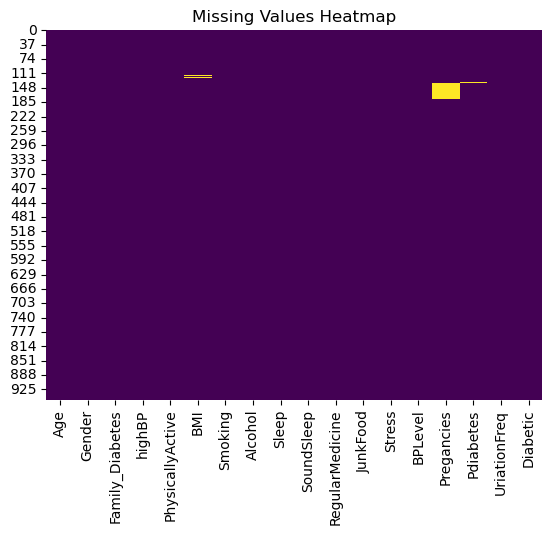

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

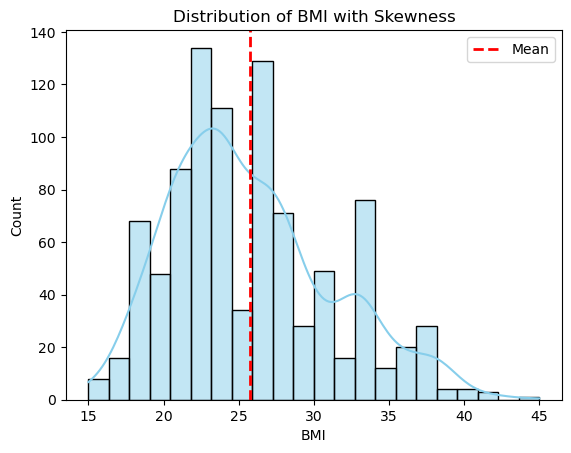

In [15]:
sns.histplot(df['BMI'], kde=True, color='skyblue')
plt.axvline(df["BMI"].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title(f'Distribution of BMI with Skewness')
plt.xlabel("BMI")
plt.legend()
plt.show()

In [16]:
df['BMI'].fillna(df['BMI'].mean(),inplace=True, axis=0)

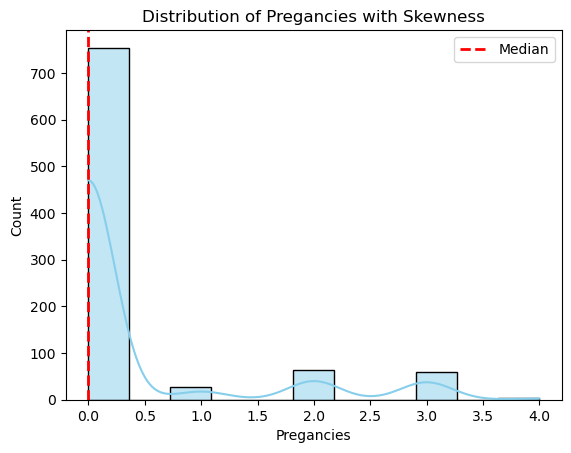

In [17]:
sns.histplot(df['Pregancies'], kde=True, color='skyblue')
plt.axvline(df["Pregancies"].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.title(f'Distribution of Pregancies with Skewness')
plt.xlabel("Pregancies")
plt.legend()
plt.show()

In [18]:
df['Pregancies'].fillna(df['Pregancies'].median(),inplace=True, axis=0)

In [19]:
df['Pdiabetes'].fillna(0,inplace=True, axis = 0)

In [20]:
df['Diabetic'].fillna("no",inplace=True, axis =0)

In [21]:
df['Diabetic'] = df['Diabetic'].str.strip()

In [22]:
df['Diabetic'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
df['Pdiabetes'] = df['Pdiabetes'].str.strip()

In [24]:
mode_value = df['Pdiabetes'].mode()[0]
df['Pdiabetes'] = df['Pdiabetes'].fillna(mode_value)

In [25]:
df['Pdiabetes'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
df['BPLevel'] = df['BPLevel'].str.lower()

In [27]:
df['BPLevel'] = df['BPLevel'].str.strip()

In [28]:
df.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

### Outlier Detection

Text(0.5, 0, 'BMI Column')

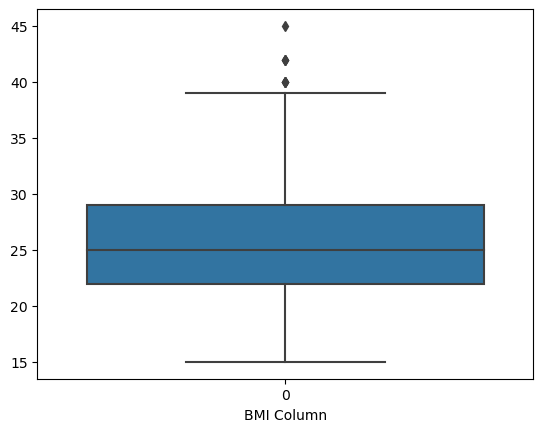

In [29]:
sns.boxplot(df['BMI'])
plt.xlabel("BMI Column")

Text(0.5, 0, 'Sleep Column')

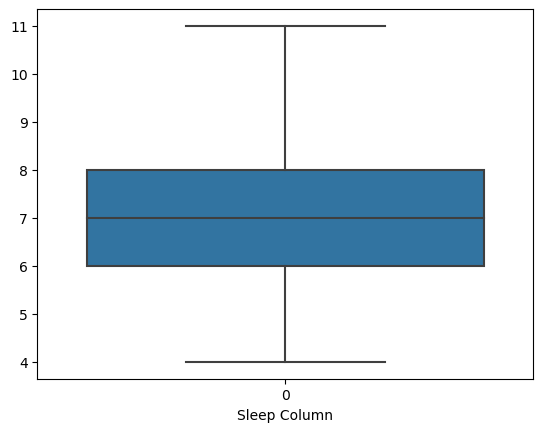

In [30]:
sns.boxplot(df['Sleep'])
plt.xlabel("Sleep Column")

Text(0.5, 0, 'SoundSleep Column')

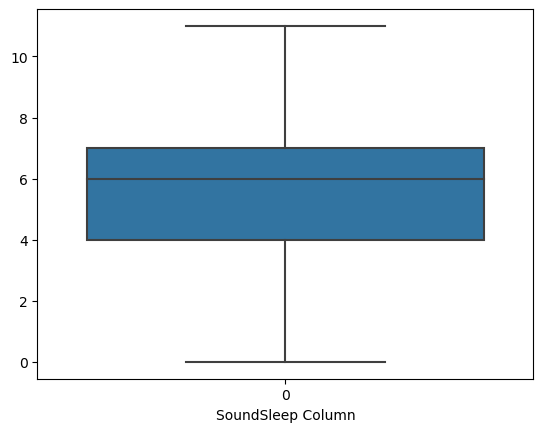

In [31]:
sns.boxplot(df['SoundSleep'])
plt.xlabel("SoundSleep Column")

### Exploratory Data Analysis

#### Univariate Analysis

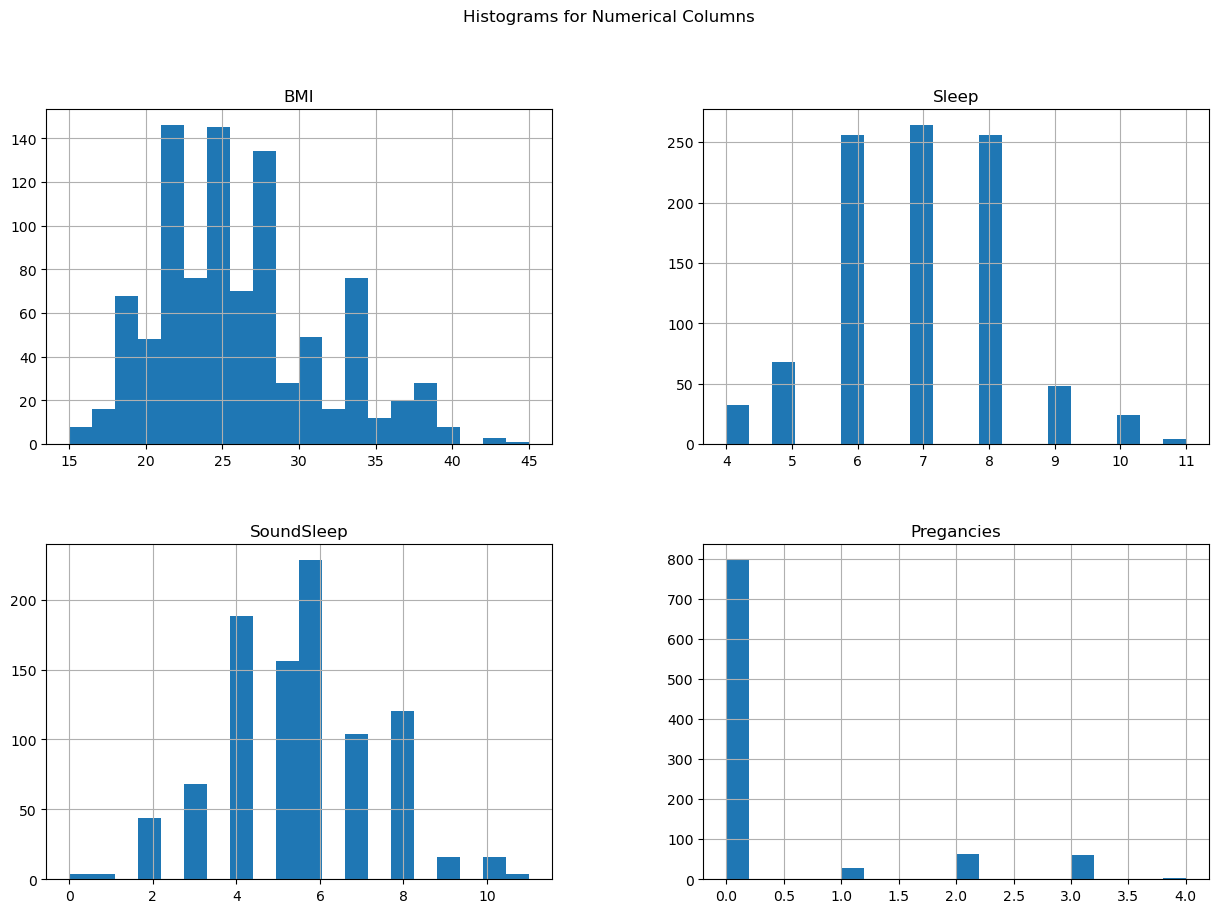

In [32]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

In [33]:
df['Pdiabetes'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
df['Pdiabetes'] = df['Pdiabetes'].replace(0, 'no')

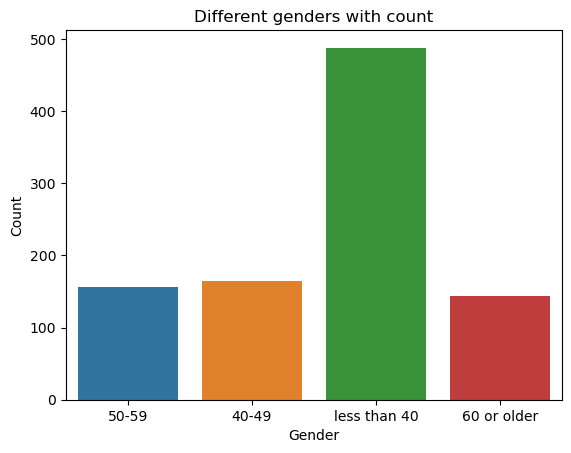

In [35]:
plt.title("Different genders with count")
sns.countplot(x='Age', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

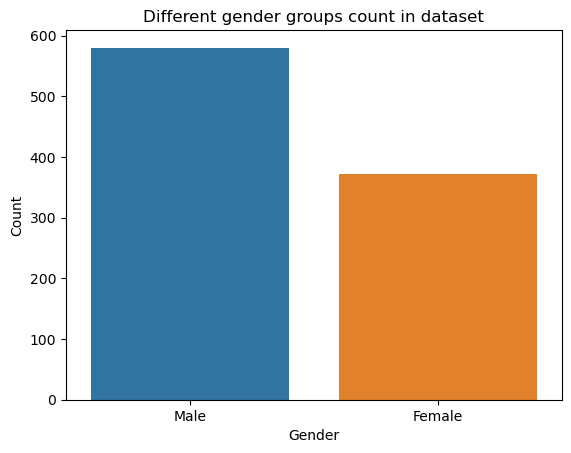

In [36]:
plt.title("Different gender groups count in dataset")
sns.countplot(x='Gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

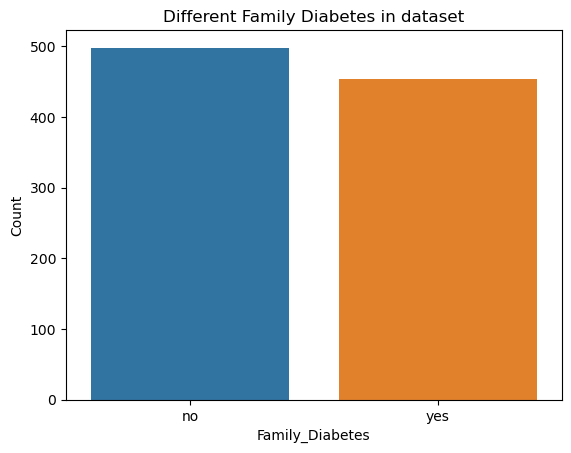

In [37]:
plt.title("Different Family Diabetes in dataset")
sns.countplot(x='Family_Diabetes', data=df)
plt.xlabel("Family_Diabetes")
plt.ylabel("Count")
plt.show()

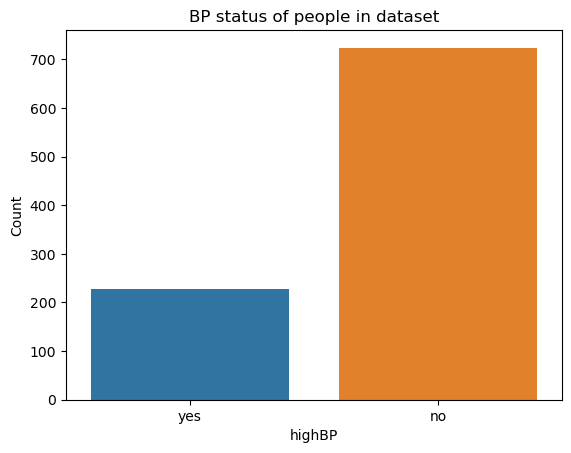

In [38]:
plt.title("BP status of people in dataset")
sns.countplot(x='highBP', data=df)
plt.xlabel("highBP")
plt.ylabel("Count")
plt.show()

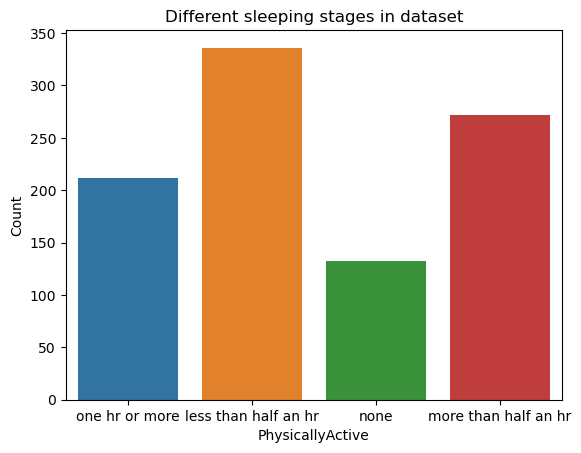

In [39]:
plt.title("Different sleeping stages in dataset")
sns.countplot(x='PhysicallyActive', data=df)
plt.xlabel('PhysicallyActive')
plt.ylabel('Count')
plt.show()

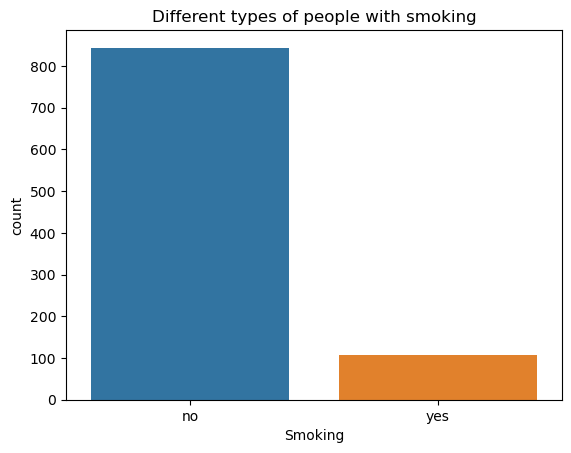

In [40]:
plt.title("Different types of people with smoking")
sns.countplot(x='Smoking', data=df)
plt.xlabel('Smoking')
plt.ylabel('count')
plt.show()

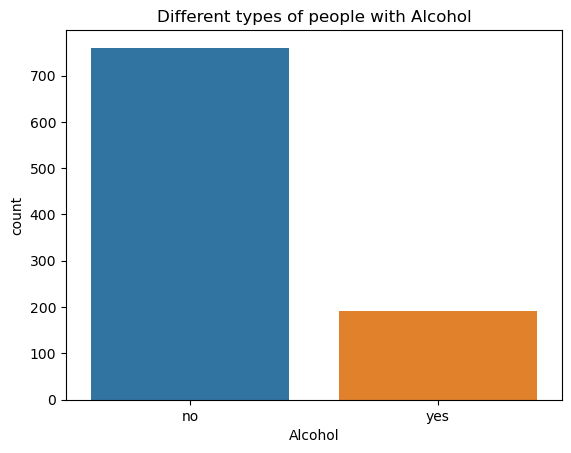

In [41]:
plt.title("Different types of people with Alcohol")
sns.countplot(x='Alcohol', data=df)
plt.xlabel('Alcohol')
plt.ylabel('count')
plt.show()

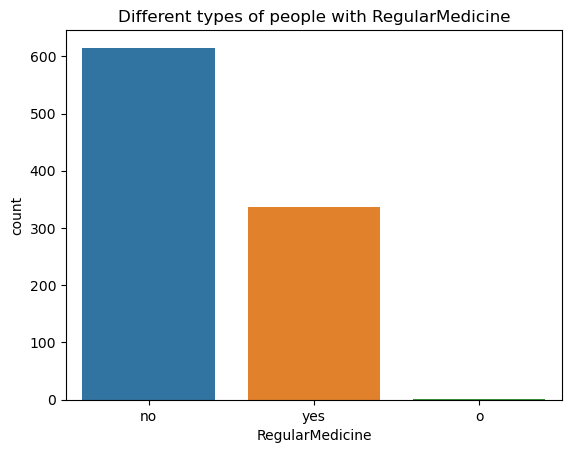

In [42]:
plt.title("Different types of people with RegularMedicine")
sns.countplot(x='RegularMedicine', data=df)
plt.xlabel('RegularMedicine')
plt.ylabel('count')
plt.show()


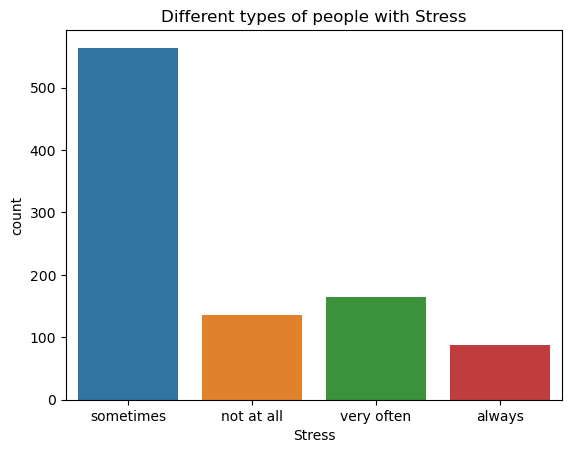

In [43]:
plt.title("Different types of people with Stress")
sns.countplot(x='Stress', data=df)
plt.xlabel('Stress')
plt.ylabel('count')
plt.show()


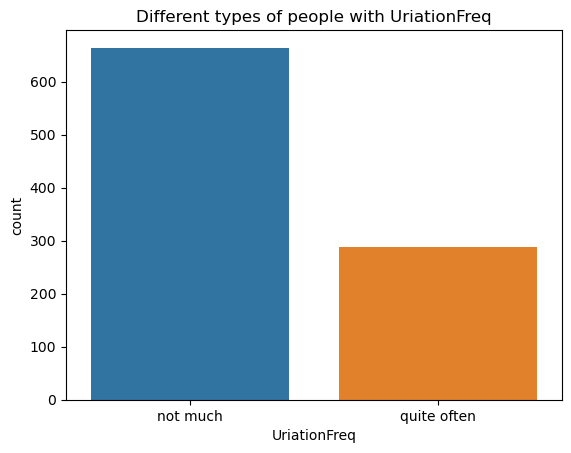

In [44]:
plt.title("Different types of people with UriationFreq")
sns.countplot(x='UriationFreq', data=df)
plt.xlabel('UriationFreq')
plt.ylabel('count')
plt.show()

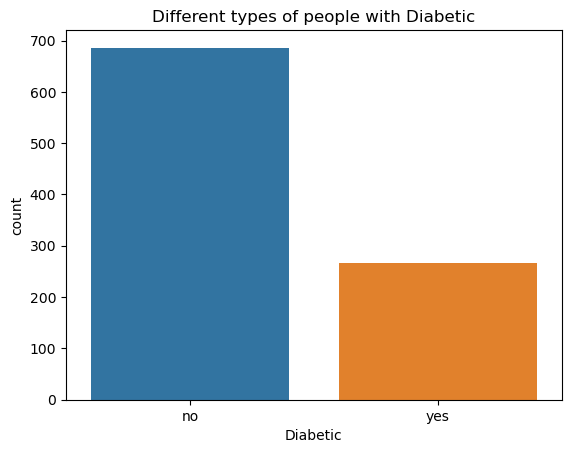

In [45]:
plt.title("Different types of people with Diabetic")
sns.countplot(x='Diabetic', data=df)
plt.xlabel('Diabetic')
plt.ylabel('count')
plt.show()

#### Bivariate Analaysis

<Axes: xlabel='Age', ylabel='count'>

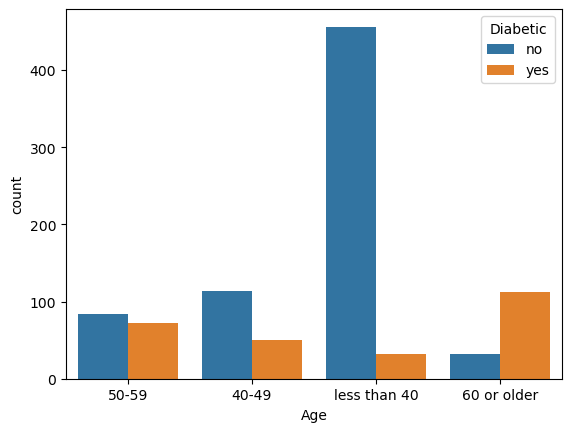

In [46]:
sns.countplot(x='Age', hue='Diabetic', data=df)

<Axes: xlabel='Gender', ylabel='count'>

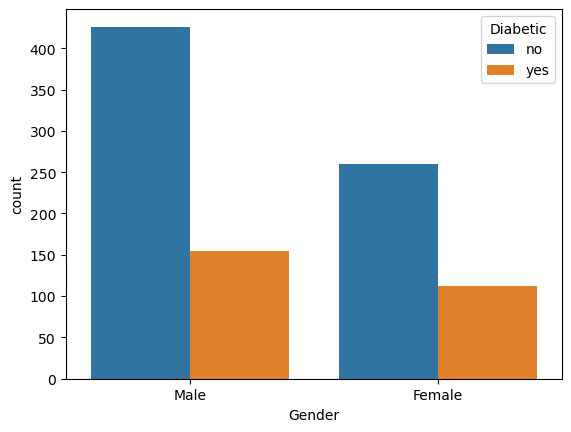

In [47]:
sns.countplot(x='Gender', hue='Diabetic', data=df)

<Axes: xlabel='Family_Diabetes', ylabel='count'>

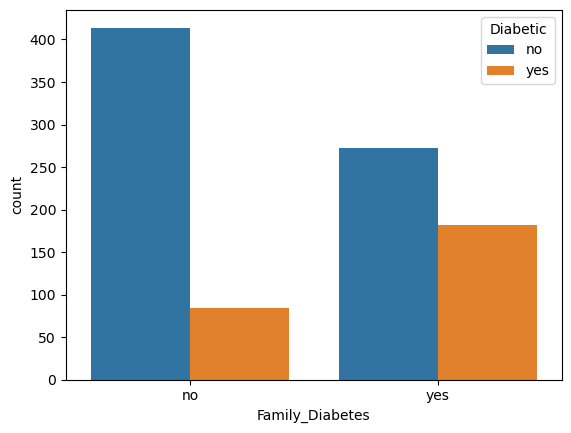

In [48]:
sns.countplot(x='Family_Diabetes', hue='Diabetic', data=df)

### Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

In [51]:
label_mappings = {}
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
        label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))
label_mappings

{'Age': {'40-49': 0, '50-59': 1, '60 or older': 2, 'less than 40': 3},
 'Gender': {'Female': 0, 'Male': 1},
 'Family_Diabetes': {'no': 0, 'yes': 1},
 'highBP': {'no': 0, 'yes': 1},
 'PhysicallyActive': {'less than half an hr': 0,
  'more than half an hr': 1,
  'none': 2,
  'one hr or more': 3},
 'Smoking': {'no': 0, 'yes': 1},
 'Alcohol': {'no': 0, 'yes': 1},
 'RegularMedicine': {'no': 0, 'o': 1, 'yes': 2},
 'JunkFood': {'always': 0, 'occasionally': 1, 'often': 2, 'very often': 3},
 'Stress': {'always': 0, 'not at all': 1, 'sometimes': 2, 'very often': 3},
 'BPLevel': {'high': 0, 'low': 1, 'normal': 2},
 'Pdiabetes': {'no': 0, 'yes': 1},
 'UriationFreq': {'not much': 0, 'quite often': 1},
 'Diabetic': {'no': 0, 'yes': 1}}

In [52]:
df.dtypes

Age                   int32
Gender                int32
Family_Diabetes       int32
highBP                int32
PhysicallyActive      int32
BMI                 float64
Smoking               int32
Alcohol               int32
Sleep                 int64
SoundSleep            int64
RegularMedicine       int32
JunkFood              int32
Stress                int32
BPLevel               int32
Pregancies          float64
Pdiabetes             int32
UriationFreq          int32
Diabetic              int32
dtype: object

In [53]:
df['Diabetic'].unique()

array([0, 1])

In [54]:
df.corr()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
Age,1.000000,0.069203,-0.140212,-0.204219,0.036707,-0.273176,0.146104,0.096763,0.011445,0.002901,-0.272648,0.078899,-0.017006,0.207841,-0.130449,-0.075116,-0.033678,-0.282701
Gender,0.069203,1.000000,-0.097399,0.025689,0.011142,-0.119537,0.286483,0.316688,-0.065568,0.018978,-0.128469,-0.043500,0.005742,-0.019887,-0.478852,-0.134663,-0.184949,-0.038665
Family_Diabetes,-0.140212,-0.097399,1.000000,0.065387,0.054883,0.114671,-0.023238,0.028497,0.049400,0.057418,0.182793,0.076016,-0.045072,-0.106892,0.104031,0.023124,0.030471,0.258472
highBP,-0.204219,0.025689,0.065387,1.000000,-0.078333,0.147265,-0.014478,0.110515,-0.070606,-0.133374,0.450301,-0.041014,-0.098576,-0.686176,0.054338,0.033678,0.123374,0.374611
PhysicallyActive,0.036707,0.011142,0.054883,-0.078333,1.000000,-0.180306,-0.025738,-0.019006,0.079548,0.153894,-0.072020,0.034353,-0.118600,0.098102,0.100753,-0.054769,-0.211367,0.078241
BMI,-0.273176,-0.119537,0.114671,0.147265,-0.180306,1.000000,-0.008901,-0.009052,-0.067772,-0.297669,0.182090,-0.009519,0.018108,-0.151821,-0.061898,0.104146,0.256250,0.124520
Smoking,0.146104,0.286483,-0.023238,-0.014478,-0.025738,-0.008901,1.000000,0.513589,-0.017061,-0.002747,-0.042805,0.022842,-0.013081,-0.015066,-0.133394,-0.016186,-0.033690,-0.008684
Alcohol,0.096763,0.316688,0.028497,0.110515,-0.019006,-0.009052,0.513589,1.000000,-0.004771,0.068522,0.066488,0.028379,-0.019811,-0.134916,-0.184821,-0.061405,-0.103061,0.066235
Sleep,0.011445,-0.065568,0.049400,-0.070606,0.079548,-0.067772,-0.017061,-0.004771,1.000000,0.534686,-0.101131,0.016214,-0.019765,0.107083,0.042325,0.080274,-0.096103,-0.065470
SoundSleep,0.002901,0.018978,0.057418,-0.133374,0.153894,-0.297669,-0.002747,0.068522,0.534686,1.000000,-0.114769,0.049491,-0.004589,0.126314,0.157518,0.033035,-0.283036,0.001403


<Axes: >

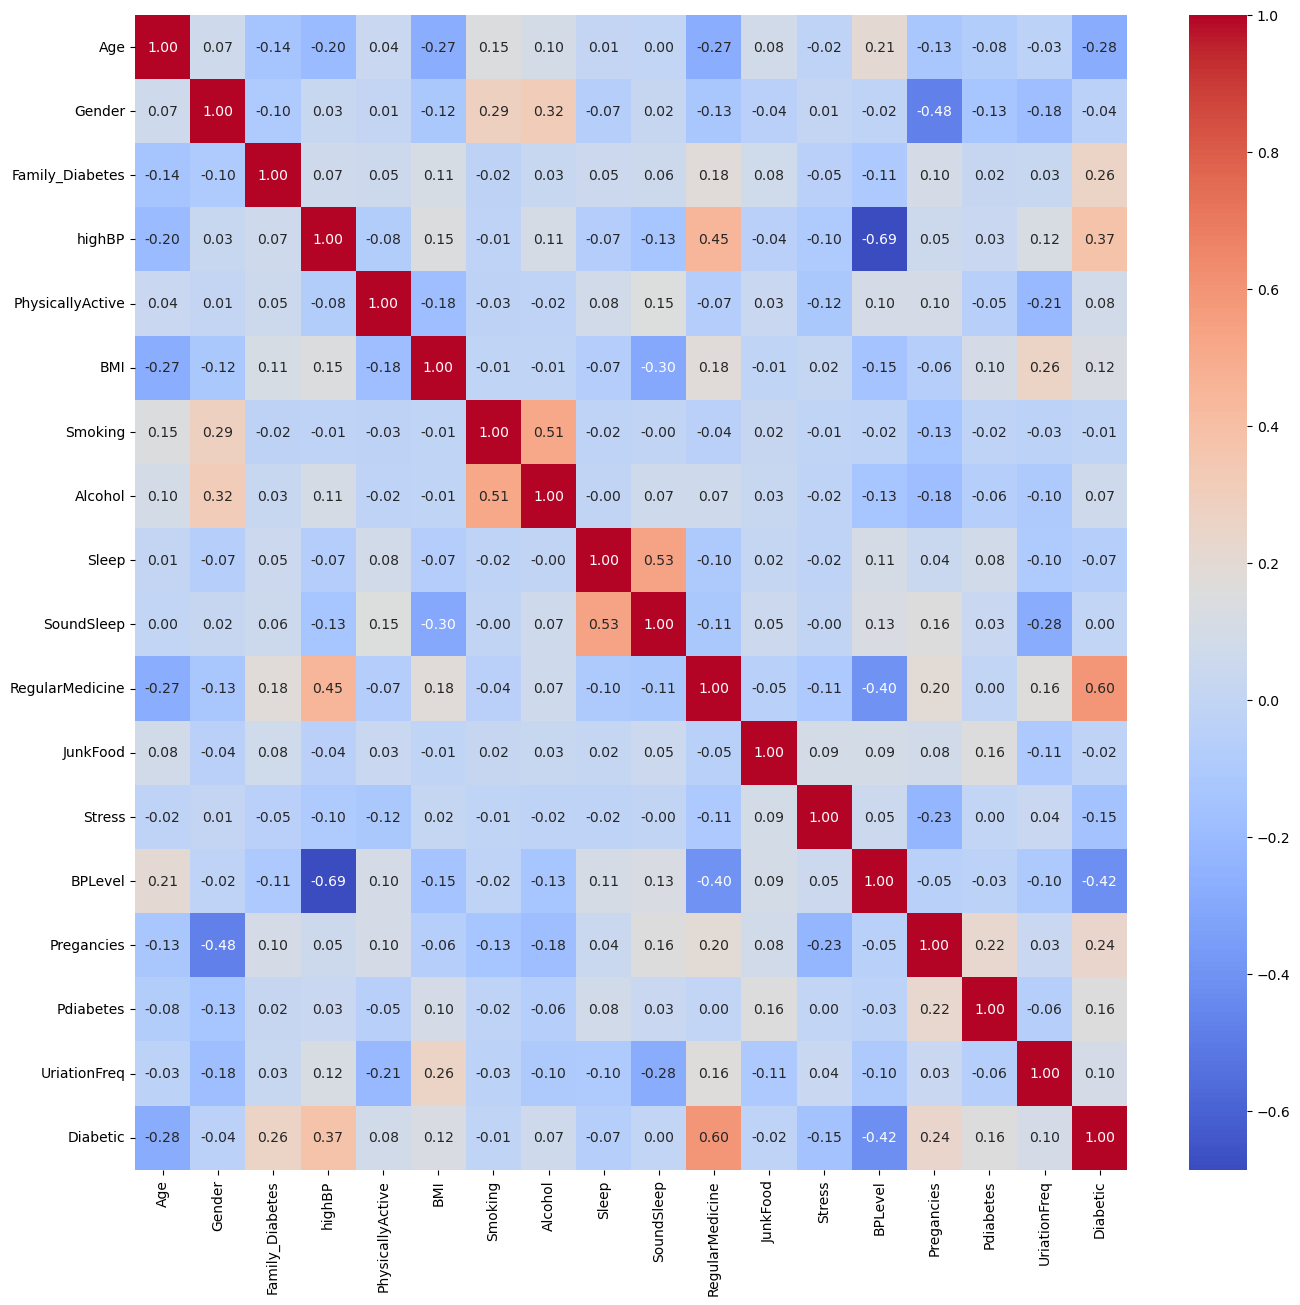

In [55]:
plt.figure(figsize=(16,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

### Feature Selection

In [56]:
df.shape

(952, 18)

In [57]:
x=df.values[:,:17]
y=df.values[:,17]

### Splitting dataset for train and test

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print("Total length of dataset: ",len(df))
print("Training Data: ",len(X_train))
print("Testing Data: ",len(X_test))

Total length of dataset:  952
Training Data:  761
Testing Data:  191


### Model Selection

#### RandomForest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train, y_train)

pred=rf.predict(X_test)

In [60]:
accuracy_score(pred, y_test)*100

93.717277486911

In [61]:
confusion_matrix(pred, y_test)

array([[129,   5],
       [  7,  50]], dtype=int64)

#### SVM Classifier

In [62]:
from sklearn.svm import SVC

svm= SVC()
svm.fit(X_train, y_train)
pred=svm.predict(X_test)

In [63]:
accuracy_score(pred, y_test)*100

79.58115183246073

In [64]:
confusion_matrix(pred, y_test)

array([[124,  27],
       [ 12,  28]], dtype=int64)

#### Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred=dt.predict(X_test)

In [66]:
accuracy_score(pred, y_test)*100

95.28795811518324

In [67]:
confusion_matrix(pred, y_test)

array([[132,   5],
       [  4,  50]], dtype=int64)

In [68]:
import pickle

output_file = 'model.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(rf, file)